# VIBE CHECK - Spotify Enhancer
## Creating Spotify Sub-Playlists of different vibes using PCA, TSNE Clustering

Please input playlisturl into variable and turn example False if for personal use

# Inputs

In [1]:
playlisturl = ""
spotifyusername = ""
example = True

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import time
%matplotlib inline

In [3]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify_client_id='7fd9b212cb4441d996b6df13aba8fba0'
spotify_client_secret = '4a2ea634bd2e4c1ea29458b00ff09743'

client_credentials_manager = SpotifyClientCredentials(client_id=spotify_client_id, client_secret=spotify_client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
def getPlaylistTrackIDs(user, playlist_id):
        ids = []
        playlist = sp.user_playlist(user, playlist_id)
        for item in playlist['tracks']['items']:
            track = item['track']
            ids.append(track['id'])
        return ids
if(example):
    ids = getPlaylistTrackIDs('Juno Kim', '1QlsVJF0fXVWqijihT2Oyt')
else:
        ids = getPlaylistTrackIDs(spotifyusername, playlisturl)

In [6]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

In [7]:

# loop over track ids to create dataset
tracks = []
for i in range(0, len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])

In [8]:
df.head(10)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Self Control,Blonde,Frank Ocean,2016-08-20,249667,73,0.572,0.7650,0.209,0.000000,0.3560,-10.413,0.0313,80.069,4
1,Same Drugs,Coloring Book,Chance the Rapper,2016-05-27,257775,65,0.461,0.9470,0.293,0.000010,0.0936,-9.520,0.0555,180.297,4
2,Midnight Diner,Midnight Diner,oksami,2020-06-15,170602,42,0.561,0.4230,0.514,0.534000,0.6400,-12.031,0.0733,83.011,4
3,Sunday Candy,Surf,Donnie Trumpet & The Social Experiment,2015-06-30,226013,64,0.511,0.5300,0.596,0.000000,0.0798,-6.560,0.2240,158.063,4
4,TEAM,SATURATION III,BROCKHAMPTON,2017-12-15,273682,48,0.312,0.3960,0.730,0.002010,0.9420,-7.433,0.1260,140.099,4
5,Egyptian Luvr (feat. Aminé),Dear Annie,Rejjie Snow,2018-02-16,256613,30,0.834,0.0553,0.591,0.000000,0.0740,-7.543,0.3050,104.944,4
6,Sweet (feat. Landon Sears),Twenties,Bren Joy,2019-05-17,226153,52,0.623,0.1740,0.730,0.000000,0.0684,-6.851,0.1240,78.056,4
7,Amphetamine,blkswn,Smino,2017-03-14,469830,64,0.619,0.7150,0.532,0.000013,0.0953,-9.554,0.5150,120.019,4
8,Love Galore (feat. Travis Scott),Ctrl,SZA,2017-06-09,275080,79,0.795,0.1120,0.594,0.000000,0.1620,-6.200,0.0748,135.002,4
9,Always,Always,Billy Lemos,2020-07-10,125374,30,0.542,0.0176,0.553,0.008400,0.1600,-5.716,0.0442,182.152,4


In [9]:
df.shape

(58, 15)

# Exploratory Data Analysis(EDA)

## Distribution Graphs

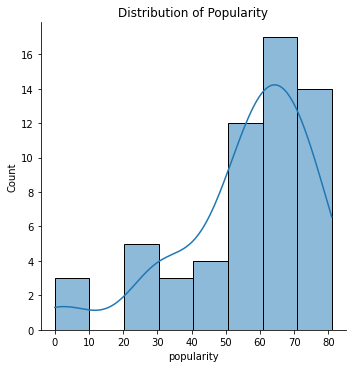

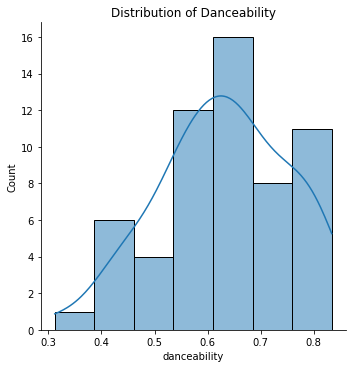

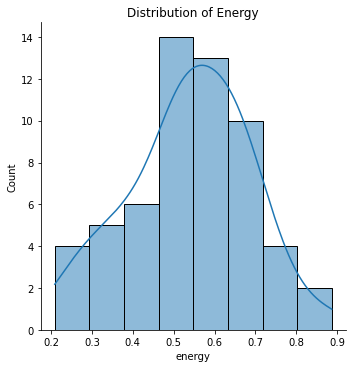

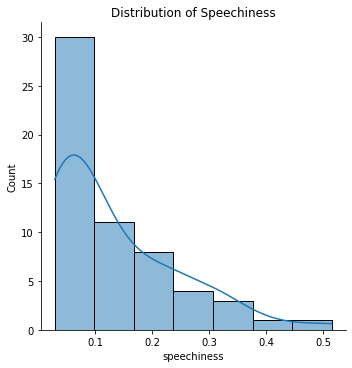

In [10]:
fig = sns.displot(df['popularity'], kde=True)
plt.title("Distribution of Popularity")
plt.show()

fig = sns.displot(df['danceability'], kde=True)
plt.title("Distribution of Danceability")
plt.show()

fig = sns.displot(df['energy'], kde=True)
plt.title("Distribution of Energy")
plt.show()

fig = sns.displot(df['speechiness'], kde=True)
plt.title("Distribution of Speechiness")
plt.show()

## Scatterplots

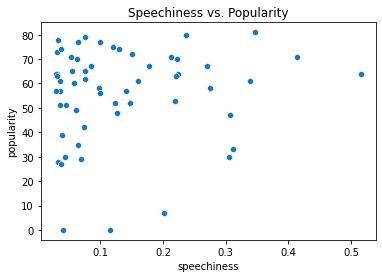

In [11]:
fig = sns.scatterplot(x='speechiness', y='popularity', data=df)
plt.title("Speechiness vs. Popularity")
plt.show()

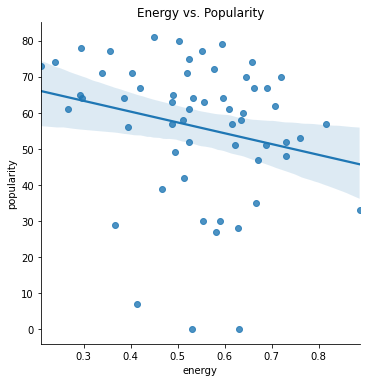

In [12]:
fig = sns.lmplot(x="energy", y='popularity', data=df)
plt.title("Energy vs. Popularity")
plt.show()


## Correlation Chart of Song Attributes

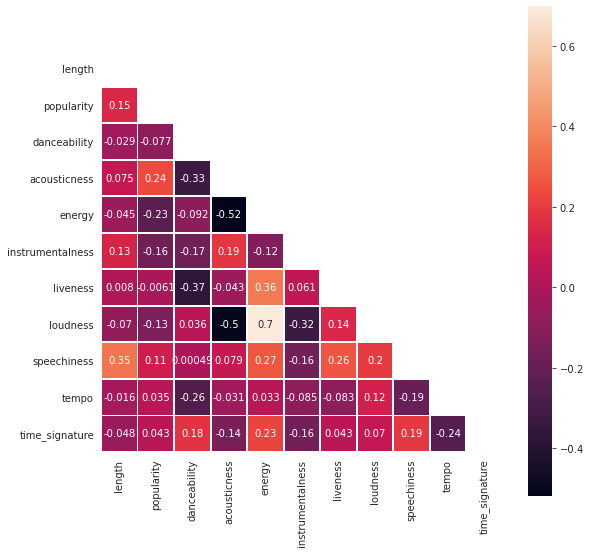

In [13]:
correlationdf = df.drop('name', axis=1)

cols = df
corr = cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 9))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, linewidths=.8)

# Clustering

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
artist_cluster = df[cluster_features]

In [16]:
X = np.array(artist_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++')
    km = km.fit(X)
    ss_dist.append(km.inertia_)

### Finding the Optimal # of Clusters(k)

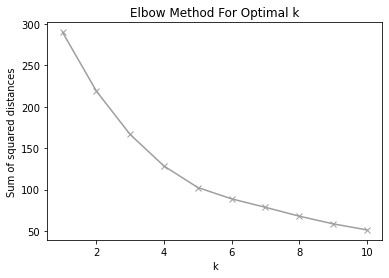

In [18]:
plt.plot(K, ss_dist, 'bx-', color = '#9e9e9e')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
num_clusters = 5
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++').fit(X)

## PCA

In [20]:
pca = PCA(n_components=4)
pca_results = pca.fit_transform(X)

In [21]:
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.9450323941974574


array([0.34222359, 0.58294305, 0.79125131, 0.94503239])

### PCA Labels

In [22]:
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3', 'PC4']
df_pca['label'] = kmeanModel.labels_
df_pca.head()

,PC1,PC2,PC3,PC4,label
0,2.322855,-0.853855,-0.856279,-0.890526,4
1,2.622296,0.259477,-0.668617,-1.257420,4
2,2.115125,0.198087,2.994241,2.557740,3
3,0.063070,1.380674,-0.252974,-0.308413,0
4,-0.034327,2.149361,1.282981,-1.576548,0


### PCA Song Visualization

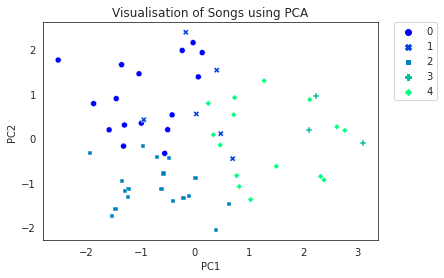

In [23]:

p = ['#DC4E76', '#CC4B93', '#A946BE', '#5C4AE4', '#35375A']
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

### 3D Axes of PCA Values

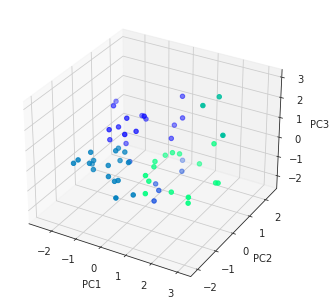

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap= 'winter')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## TSNE(T-Distributed Stochastic Neighbor Embedding)

In [25]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, learning_rate=190)
tsne_results = tsne.fit_transform(X)

In [26]:
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = kmeanModel.labels_
df_tsne.head()

,D1,D2,label
0,92.167671,-30.968212,4
1,104.416245,3.015376,4
2,91.882790,-107.459282,3
3,19.089470,43.681927,0
4,-121.731407,19.861208,0


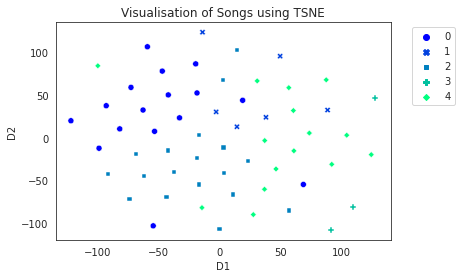

In [27]:
sns.set_style('white')
sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Visualisation of Songs using TSNE')
plt.show()

## Cluster Visualizations

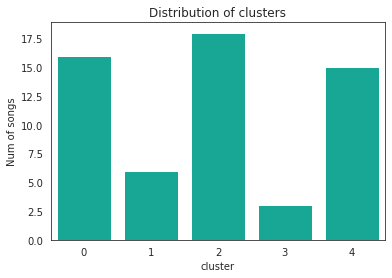

In [28]:
df.loc[:,'cluster'] = kmeanModel.labels_
artist_cluster_size = df.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data= artist_cluster_size, x='cluster', y='Num of songs', color='#00BFA5')
plt.title('Distribution of clusters')
plt.show()

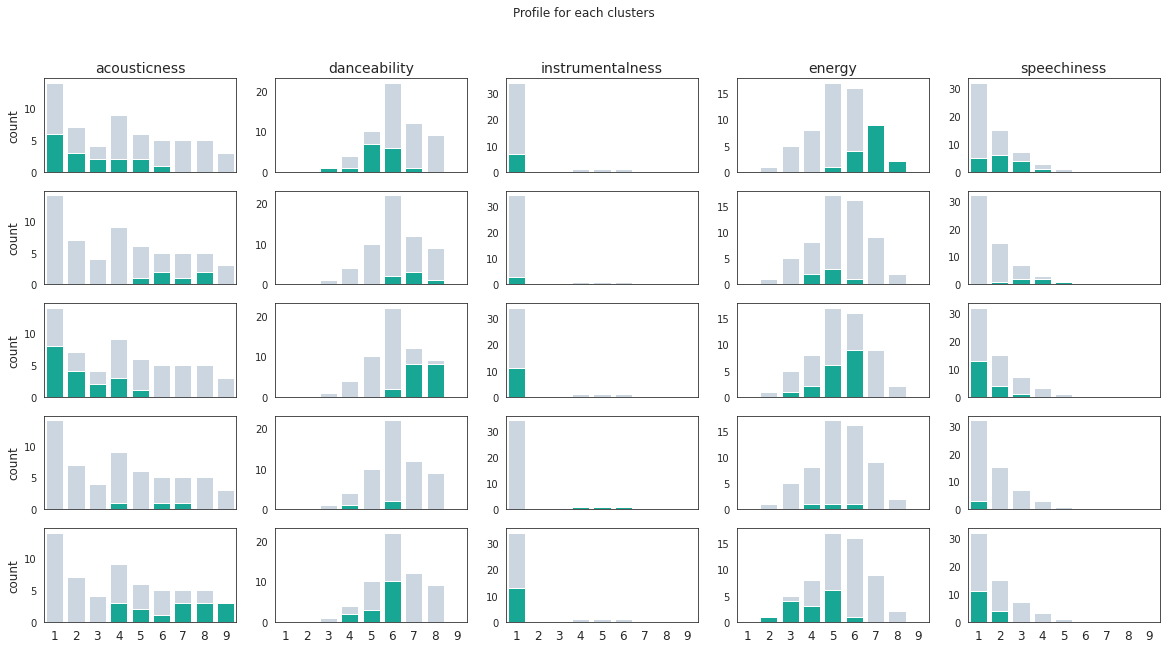

In [29]:
# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots
num_features = len(cluster_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df['cluster'].unique()):
#     filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df[df['cluster'] == cluster]
    col = 0
    
    for feature in cluster_features:
#         create binned count for all recent df and clustered df
        rec_grp = df.groupby(pd.cut(df[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
#         plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='#c8d6e5', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='#00BFA5', ax=axes[row, col])
        
#         configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

# SUB-PLAYLISTS(RESULT)

Sub-Playlist 1(example: Happy)

In [30]:
cluster_num = 0
df_cluster1 =df[df['cluster'] == cluster_num]
df_cluster1.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
3,Sunday Candy,Surf,Donnie Trumpet & The Social Experiment,2015-06-30,226013,64,0.511,0.5300,0.596,0.000000,0.0798,-6.560,0.2240,158.063,4,0
4,TEAM,SATURATION III,BROCKHAMPTON,2017-12-15,273682,48,0.312,0.3960,0.730,0.002010,0.9420,-7.433,0.1260,140.099,4,0
6,Sweet (feat. Landon Sears),Twenties,Bren Joy,2019-05-17,226153,52,0.623,0.1740,0.730,0.000000,0.0684,-6.851,0.1240,78.056,4,0
9,Always,Always,Billy Lemos,2020-07-10,125374,30,0.542,0.0176,0.553,0.008400,0.1600,-5.716,0.0442,182.152,4,0
10,Cookie Chips,Cookie Chips,Rejjie Snow,2020-07-13,259906,58,0.458,0.4500,0.635,0.000108,0.1140,-7.697,0.2750,91.926,4,0


Sub-Playlist 2(Rhythmic)

In [31]:
cluster_num = 1
df_cluster2 =df[df['cluster'] == cluster_num]
df_cluster2.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
7,Amphetamine,blkswn,Smino,2017-03-14,469830,64,0.619,0.715,0.532,0.000013,0.0953,-9.554,0.515,120.019,4,1
13,Ultralight Beam,The Life Of Pablo,Kanye West,2016-06-10,320680,71,0.592,0.620,0.403,0.000000,0.5400,-8.768,0.414,105.169,4,1
30,Chanel,Chanel,Frank Ocean,2017-03-10,210285,80,0.776,0.874,0.503,0.000000,0.1120,-5.732,0.237,110.134,4,1
32,Photosynthesis,Bucket List Project,Saba,2016-10-27,201732,67,0.777,0.536,0.662,0.000005,0.5930,-8.393,0.270,111.130,4,1
46,Sleepwalking,Vintage Court,Ben Beal,2018-01-19,188855,7,0.784,0.791,0.414,0.000026,0.1240,-8.733,0.201,100.083,4,1


Sub-Playlist 3(Instrumental/Study)

In [32]:
cluster_num = 2
df_cluster3 =df[df['cluster'] == cluster_num]
df_cluster3.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
5,Egyptian Luvr (feat. Aminé),Dear Annie,Rejjie Snow,2018-02-16,256613,30,0.834,0.0553,0.591,0.000000,0.0740,-7.543,0.3050,104.944,4,2
8,Love Galore (feat. Travis Scott),Ctrl,SZA,2017-06-09,275080,79,0.795,0.1120,0.594,0.000000,0.1620,-6.200,0.0748,135.002,4,2
15,Riri,Riri,Aminé,2020-05-29,182138,28,0.812,0.0467,0.628,0.000002,0.2260,-6.128,0.0327,121.990,4,2
17,Stranger (feat. Saba & Jarreau Vandal),Stranger (feat. Saba & Jarreau Vandal),Gaidaa,2020-07-21,219451,0,0.784,0.3380,0.531,0.000023,0.0996,-7.756,0.0410,87.982,4,2
18,Love In My Pocket,Love In My Pocket,Rich Brian,2020-07-10,223093,57,0.832,0.0200,0.615,0.000000,0.1100,-7.948,0.0351,113.017,4,2


Sub-Playlist 4(Sassy)

In [33]:
cluster_num = 3
df_cluster4 =df[df['cluster'] == cluster_num]
df_cluster4.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
2,Midnight Diner,Midnight Diner,oksami,2020-06-15,170602,42,0.561,0.423,0.514,0.534,0.6400,-12.031,0.0733,83.011,4,3
23,Restless Song 동요,Restless Song / Halcyon's Coffin 동요 / 할시온의 관,Shadow Community 그림자 공동체,2019-12-30,308449,27,0.436,0.586,0.581,0.424,0.1110,-8.923,0.0379,160.641,3,3
24,Really Love,Black Messiah,D'Angelo,2014-12-15,344346,56,0.638,0.724,0.395,0.569,0.0761,-11.299,0.1000,78.516,4,3


Sub-Playlist 5(Emotional)

In [34]:
cluster_num = 4
df_cluster5 =df[df['cluster'] == cluster_num]
df_cluster5.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Self Control,Blonde,Frank Ocean,2016-08-20,249667,73,0.572,0.765,0.209,0.000000,0.3560,-10.413,0.0313,80.069,4,4
1,Same Drugs,Coloring Book,Chance the Rapper,2016-05-27,257775,65,0.461,0.947,0.293,0.000010,0.0936,-9.520,0.0555,180.297,4,4
12,Juno,Honeybloom,Choker,2018-08-03,231680,61,0.438,0.922,0.266,0.000298,0.1480,-12.863,0.0363,120.075,4,4
14,Warm (feat. Mia),Warm (feat. Mia),Dre'es,2017-10-19,255465,64,0.662,0.888,0.297,0.108000,0.1190,-14.525,0.0301,94.023,4,4
20,Sandstorm (feat. JID),The Jungle Is The Only Way Out,Mereba,2019-02-27,179026,58,0.637,0.590,0.512,0.000464,0.0712,-10.027,0.0978,109.492,5,4


## Radio Chart & Table of each Playlist on attributes

In [35]:
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,acousticness,danceability,instrumentalness,energy,speechiness
0,0,0.225344,0.541000,0.002249,0.694000,0.171669
1,1,0.694167,0.713833,0.000007,0.493833,0.330667
2,2,0.188111,0.744333,0.000537,0.532167,0.084444
3,3,0.577667,0.545000,0.509000,0.496667,0.070400
4,4,0.693867,0.571733,0.016218,0.407000,0.085773


In [36]:
import math

def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,math.ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

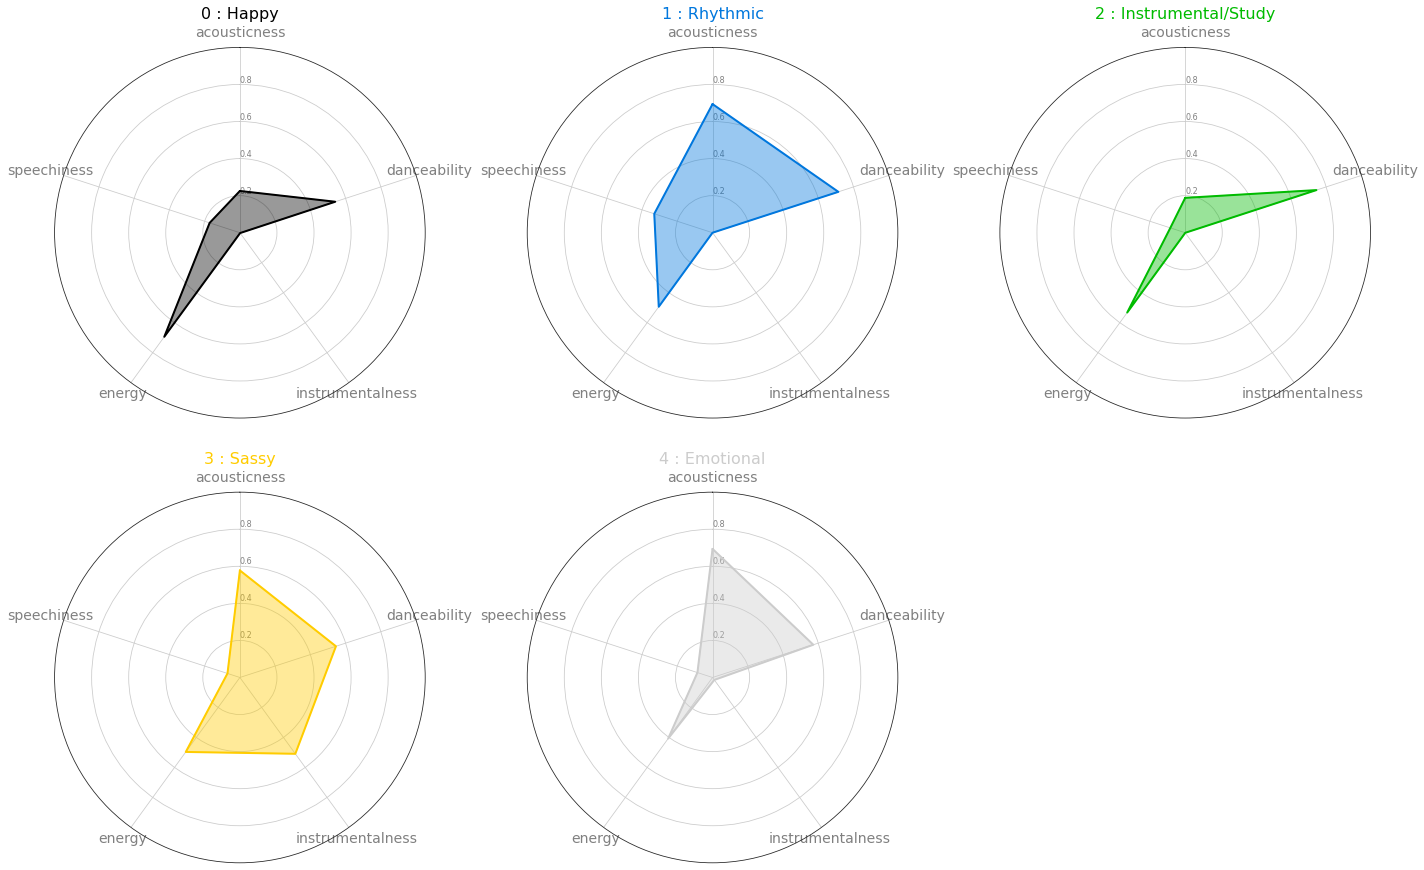

In [37]:
pi = math.pi

# initialize the figure
p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B'
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar.index))

# Create cluster name
title_list = ['Happy', 'Rhythmic', "Instrumental/Study", 'Sassy', 'Emotional']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()